In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Datathon 2024/Chevron/Train/training.csv')
df

,Unnamed: 0,surface_x,surface_y,bh_x,bh_y,standardized_operator_name,gross_perforated_length,number_of_stages,total_proppant,total_fluid,...,relative_well_position,batch_frac_classification,well_family_relationship,frac_type,frac_seasoning,horizontal_midpoint_x,horizontal_midpoint_y,horizontal_toe_x,horizontal_toe_y,OilPeakRate
0,0,1383493.751,717329.2368,1382854.564,712767.3700,1121,3963.582677,NaN,76000.0000,NaN,...,Standalone Well,Unknown,Standalone Well,Primary Frac,NaN,1383030.678,714796.3610,1382668.912,712798.4321,46.623023
1,1,1380344.035,711916.2732,1379738.429,707860.5643,1022,3179.133858,NaN,113000.0000,5.610964e+05,...,Outer Well,Unknown,Infill Child Well,Primary Frac,NaN,1379965.126,709541.7145,1379630.025,707907.6708,59.750009
2,2,1379915.895,717845.0063,1379274.644,713471.9952,1304,3810.039370,12.0,286571.4286,1.621424e+06,...,Standalone Well,Non-Batch Frac,Standalone Well,Primary Frac,92.0,1379357.250,715381.2327,1378960.372,713530.4490,10.785716
3,3,1383567.443,706640.2010,1382891.477,702068.3838,1022,3723.425197,11.0,106878.9286,4.377134e+05,...,Standalone Well,Unknown,Standalone Well,Primary Frac,NaN,1383099.610,704058.8508,1382727.299,702098.4882,123.797638
4,4,1378962.585,702623.9787,1379643.546,707204.9131,1022,3811.023622,NaN,112789.7143,6.229802e+05,...,Outer Well,Unknown,Infill Child Well,Primary Frac,NaN,1379546.414,705150.7519,1379987.487,707123.7258,102.309540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29687,30087,1441088.593,978921.8705,1432758.032,979984.5869,1050,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Primary Frac,NaN,NaN,NaN,NaN,NaN,NaN
29688,30088,1513299.189,976157.4486,1519890.072,975148.4820,1159,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Primary Frac,NaN,NaN,NaN,NaN,NaN,NaN
29689,30089,1458652.142,972862.2346,1453129.889,973195.0998,1050,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Primary Frac,NaN,NaN,NaN,NaN,NaN,NaN
29690,30090,1463417.436,972485.8276,1468807.765,971564.9743,1153,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Primary Frac,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df[["relative_well_position"]].value_counts()

relative_well_position
Standalone Well           8671
Outer Well                6294
Inner Well                4905
Unknown                    597
dtype: int64

In [6]:
df[["batch_frac_classification"]].value_counts()


batch_frac_classification
Non-Batch Frac               7150
Unknown                      5756
Batch-Concurrent Frac        4707
Batch-Sequential Frac        2854
dtype: int64

In [7]:
df[["well_family_relationship"]].value_counts()


well_family_relationship
Standalone Well             8671
Sibling Well                7283
Infill Child Well           3916
Unknown                      597
dtype: int64

In [8]:
df[["frac_type"]].value_counts()

frac_type      
Primary Frac       29602
Refrac                89
Protection Frac        1
dtype: int64

In [9]:
df[['standardized_operator_name']].value_counts()

standardized_operator_name
1213                          2481
1145                          1730
1121                          1464
1091                          1379
1018                          1343
                              ... 
1264                             1
1261                             1
1260                             1
1258                             1
1179                             1
Length: 350, dtype: int64

In [10]:
df[['OilPeakRate']].isna().sum()/len(df[['OilPeakRate']])

OilPeakRate    0.349791
dtype: float64

In [11]:
#New Dataframe with removed columns by industry knowledge #frac_type is all primary
df.columns
columns_to_remove = ['Unnamed: 0', 'bh_x', 'bh_y', 'standardized_operator_name',
       'number_of_stages', 'total_proppant',
       'average_stage_length','average_proppant_per_stage', 'average_frac_fluid_per_stage',
       'pad_id',  'horizontal_midpoint_x', 'horizontal_midpoint_y',
       'horizontal_toe_x', 'horizontal_toe_y', 'frac_type']

df1 = df.drop(columns_to_remove,axis=1)
df1

,surface_x,surface_y,gross_perforated_length,total_fluid,true_vertical_depth,ffs_frac_type,proppant_intensity,frac_fluid_intensity,proppant_to_frac_fluid_ratio,frac_fluid_to_proppant_ratio,bin_lateral_length,relative_well_position,batch_frac_classification,well_family_relationship,frac_seasoning,OilPeakRate
0,1383493.751,717329.2368,3963.582677,NaN,8712.598425,NaN,19.174572,NaN,NaN,NaN,1.0,Standalone Well,Unknown,Standalone Well,NaN,46.623023
1,1380344.035,711916.2732,3179.133858,5.610964e+05,8627.952756,NaN,35.544272,176.493480,0.201391,4.965455,1.0,Outer Well,Unknown,Infill Child Well,NaN,59.750009
2,1379915.895,717845.0063,3810.039370,1.621424e+06,8801.181102,NaN,75.214821,425.566078,0.176741,5.658008,1.0,Standalone Well,Non-Batch Frac,Standalone Well,92.0,10.785716
3,1383567.443,706640.2010,3723.425197,4.377134e+05,8635.826772,NaN,28.704465,117.556659,0.244176,4.095414,1.0,Standalone Well,Unknown,Standalone Well,NaN,123.797638
4,1378962.585,702623.9787,3811.023622,6.229802e+05,8664.370079,NaN,29.595648,163.467933,0.181049,5.523377,1.0,Outer Well,Unknown,Infill Child Well,NaN,102.309540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29687,1441088.593,978921.8705,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29688,1513299.189,976157.4486,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29689,1458652.142,972862.2346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29690,1463417.436,972485.8276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#NaN Values
df1.isna().sum()/len(df[['OilPeakRate']])

surface_x                       0.000000
surface_y                       0.000000
gross_perforated_length         0.254513
total_fluid                     0.357537
true_vertical_depth             0.050350
ffs_frac_type                   0.508790
proppant_intensity              0.361074
frac_fluid_intensity            0.361916
proppant_to_frac_fluid_ratio    0.371683
frac_fluid_to_proppant_ratio    0.371683
bin_lateral_length              0.254513
relative_well_position          0.310690
batch_frac_classification       0.310690
well_family_relationship        0.310690
frac_seasoning                  0.502627
OilPeakRate                     0.349791
dtype: float64

In [13]:
df1.isna().sum()/len(df[['OilPeakRate']])

surface_x                       0.000000
surface_y                       0.000000
gross_perforated_length         0.254513
total_fluid                     0.357537
true_vertical_depth             0.050350
ffs_frac_type                   0.508790
proppant_intensity              0.361074
frac_fluid_intensity            0.361916
proppant_to_frac_fluid_ratio    0.371683
frac_fluid_to_proppant_ratio    0.371683
bin_lateral_length              0.254513
relative_well_position          0.310690
batch_frac_classification       0.310690
well_family_relationship        0.310690
frac_seasoning                  0.502627
OilPeakRate                     0.349791
dtype: float64

<ipython-input-14-086f5d2cc923>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = df.corr()


<Axes: >

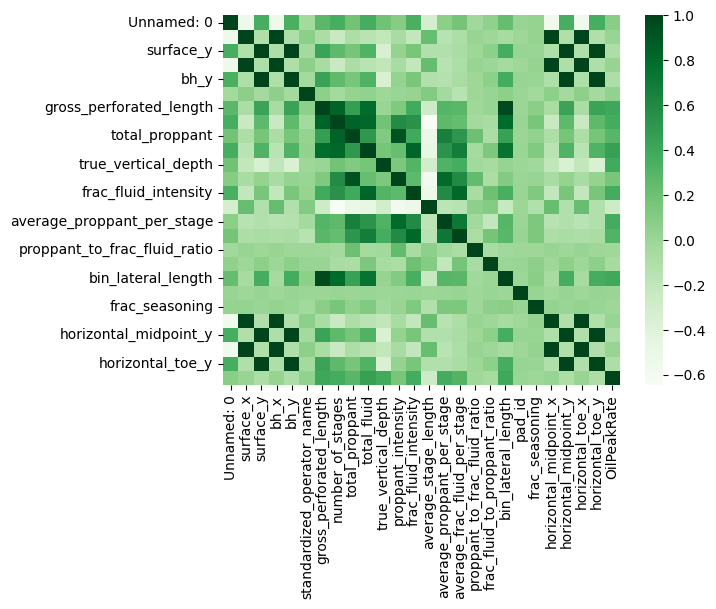

In [14]:
matrix = df.corr()

#plotting correlation matrix
sns.heatmap(matrix, cmap="Greens", annot=False)

<Axes: >

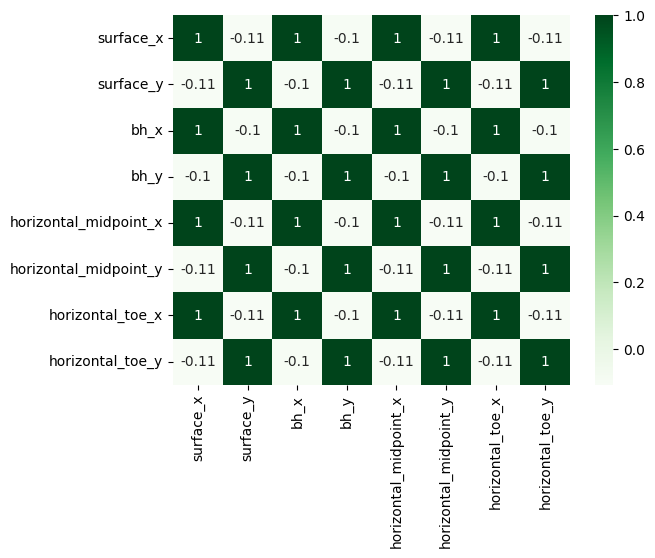

In [15]:
df.columns
matrix = df[['surface_x', 'surface_y', 'bh_x', 'bh_y','horizontal_midpoint_x', 'horizontal_midpoint_y',
       'horizontal_toe_x', 'horizontal_toe_y']].corr()

#plotting correlation matrix
sns.heatmap(matrix, cmap="Greens", annot=True)

<Axes: >

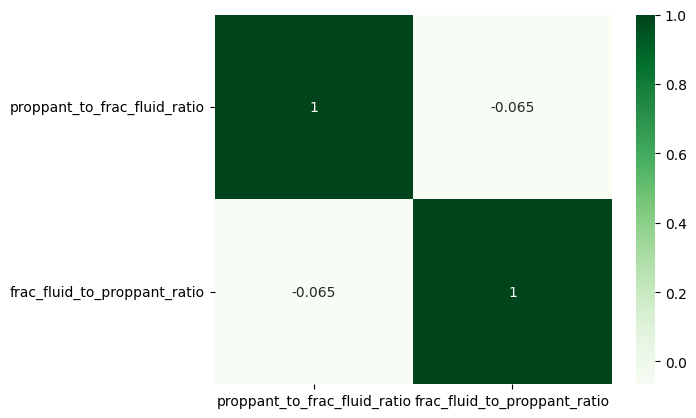

In [16]:
#correlation matrix for proppant_to_frac_fluid_ratio and frac_fluid_to_proppant_ratio

#plotting correlation matrix
sns.heatmap(df[["proppant_to_frac_fluid_ratio", "frac_fluid_to_proppant_ratio"]].corr(), cmap="Greens", annot=True)

<Axes: >

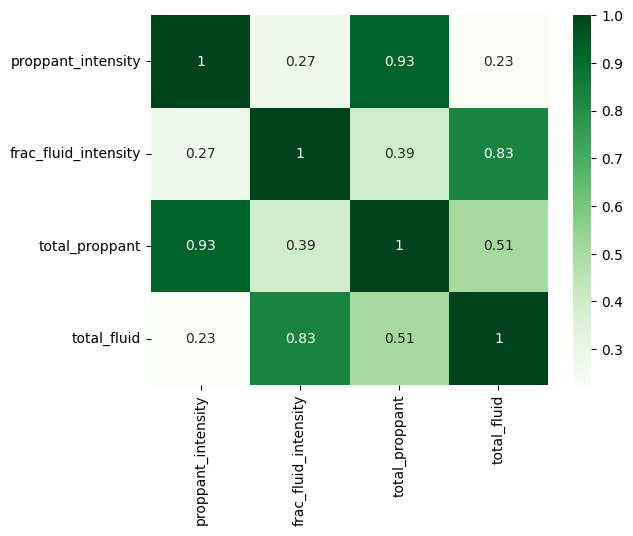

In [17]:
#correlation matrix for proppant_intensity, frac_fluid_intensity
matrix2 = df[["proppant_intensity", "frac_fluid_intensity","total_proppant", "total_fluid"]].corr()

#plotting correlation matrix
sns.heatmap(matrix2, cmap="Greens", annot=True)

In [18]:
dataframe_nan = df.isna().sum()/len(df[['OilPeakRate']])

In [19]:
df.columns

Index(['Unnamed: 0', 'surface_x', 'surface_y', 'bh_x', 'bh_y',
       'standardized_operator_name', 'gross_perforated_length',
       'number_of_stages', 'total_proppant', 'total_fluid',
       'true_vertical_depth', 'ffs_frac_type', 'proppant_intensity',
       'frac_fluid_intensity', 'average_stage_length',
       'average_proppant_per_stage', 'average_frac_fluid_per_stage',
       'proppant_to_frac_fluid_ratio', 'frac_fluid_to_proppant_ratio',
       'bin_lateral_length', 'pad_id', 'relative_well_position',
       'batch_frac_classification', 'well_family_relationship', 'frac_type',
       'frac_seasoning', 'horizontal_midpoint_x', 'horizontal_midpoint_y',
       'horizontal_toe_x', 'horizontal_toe_y', 'OilPeakRate'],
      dtype='object')

In [20]:
df1.sort_values(by="OilPeakRate", na_position='first')

,surface_x,surface_y,gross_perforated_length,total_fluid,true_vertical_depth,ffs_frac_type,proppant_intensity,frac_fluid_intensity,proppant_to_frac_fluid_ratio,frac_fluid_to_proppant_ratio,bin_lateral_length,relative_well_position,batch_frac_classification,well_family_relationship,frac_seasoning,OilPeakRate
48,1600422.386,7.190630e+05,NaN,NaN,4810.325383,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,1619709.105,7.421551e+05,NaN,NaN,4202.755906,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,1527721.679,5.861419e+05,4023.622047,6.119556e+05,NaN,NaN,NaN,152.090725,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
58,1521926.276,6.191549e+05,4086.614173,5.163981e+05,NaN,NaN,24.225434,126.363307,0.191713,5.216142,1.0,Standalone Well,Unknown,Standalone Well,NaN,NaN
59,1487456.835,5.865620e+05,4107.283465,4.858941e+05,NaN,NaN,NaN,118.300594,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4988,1056284.676,8.222274e+05,8950.787402,8.303336e+06,12184.055120,Slickwater Only,209.462817,927.665401,0.225796,4.428783,2.0,Standalone Well,Non-Batch Frac,Standalone Well,38.0,1385.083548
2929,1065415.300,7.033723e+05,9724.409449,4.539353e+06,8787.401575,Undefined,110.238057,466.799885,0.236157,4.234471,2.0,Outer Well,Batch-Concurrent Frac,Sibling Well,45.0,1437.404984
5913,1139098.079,7.691446e+05,9633.858268,3.963630e+06,10252.952760,Slickwater Crosslink Hybrid,112.860879,411.427022,0.274316,3.645435,2.0,Inner Well,Batch-Concurrent Frac,Sibling Well,36.0,1643.357000
12190,1166852.543,1.398559e+06,10214.566930,8.259032e+06,7873.031496,Slickwater Linear Hybrid,134.933348,808.554297,0.166882,5.992250,2.0,Inner Well,Batch-Concurrent Frac,Sibling Well,0.0,2448.143236


In [21]:
df2 = df1.loc[df1['OilPeakRate'].isnull()]
df2.isnull().sum().sort_values()/len(df2)

surface_x                       0.000000
surface_y                       0.000000
true_vertical_depth             0.133834
gross_perforated_length         0.712401
bin_lateral_length              0.712401
total_fluid                     0.883497
relative_well_position          0.888215
batch_frac_classification       0.888215
well_family_relationship        0.888215
proppant_to_frac_fluid_ratio    0.888793
frac_fluid_to_proppant_ratio    0.888793
frac_fluid_intensity            0.891681
proppant_intensity              0.894184
frac_seasoning                  0.972174
ffs_frac_type                   0.973522
OilPeakRate                     1.000000
dtype: float64

In [22]:
#only keep non NaN values from target variable
df3 = df1.loc[df1['OilPeakRate'].isnull() == False]

In [23]:
df3

,surface_x,surface_y,gross_perforated_length,total_fluid,true_vertical_depth,ffs_frac_type,proppant_intensity,frac_fluid_intensity,proppant_to_frac_fluid_ratio,frac_fluid_to_proppant_ratio,bin_lateral_length,relative_well_position,batch_frac_classification,well_family_relationship,frac_seasoning,OilPeakRate
0,1.383494e+06,7.173292e+05,3963.582677,NaN,8712.598425,NaN,19.174572,NaN,NaN,NaN,1.0,Standalone Well,Unknown,Standalone Well,NaN,46.623023
1,1.380344e+06,7.119163e+05,3179.133858,5.610964e+05,8627.952756,NaN,35.544272,176.493480,0.201391,4.965455,1.0,Outer Well,Unknown,Infill Child Well,NaN,59.750009
2,1.379916e+06,7.178450e+05,3810.039370,1.621424e+06,8801.181102,NaN,75.214821,425.566078,0.176741,5.658008,1.0,Standalone Well,Non-Batch Frac,Standalone Well,92.0,10.785716
3,1.383567e+06,7.066402e+05,3723.425197,4.377134e+05,8635.826772,NaN,28.704465,117.556659,0.244176,4.095414,1.0,Standalone Well,Unknown,Standalone Well,NaN,123.797638
4,1.378963e+06,7.026240e+05,3811.023622,6.229802e+05,8664.370079,NaN,29.595648,163.467933,0.181049,5.523377,1.0,Outer Well,Unknown,Infill Child Well,NaN,102.309540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29432,9.477118e+05,1.057502e+06,4101.377953,5.499711e+05,8877.952756,NaN,23.371936,134.094222,0.174295,5.737403,1.0,Standalone Well,Unknown,Standalone Well,NaN,162.307168
29433,9.593475e+05,1.033564e+06,4512.795276,NaN,8479.330709,Slickwater Crosslink Hybrid,NaN,NaN,NaN,NaN,1.0,Outer Well,Non-Batch Frac,Sibling Well,14.0,171.071455
29434,9.669162e+05,1.057804e+06,3660.433071,6.214390e+05,8640.748031,Slickwater Crosslink Hybrid,24.001844,169.771992,0.141377,7.073290,1.0,Standalone Well,Non-Batch Frac,Standalone Well,72.0,7.171827
29435,9.462629e+05,1.034169e+06,5930.118110,1.956479e+06,8389.763780,Crosslink Only,64.730101,329.922425,0.196198,5.096893,1.0,Standalone Well,Non-Batch Frac,Standalone Well,15.0,336.044270


In [24]:
#Number of NaN values
df3.isnull().sum().sort_values()/len(df3)

surface_x                       0.000000
surface_y                       0.000000
relative_well_position          0.000000
batch_frac_classification       0.000000
well_family_relationship        0.000000
OilPeakRate                     0.000000
true_vertical_depth             0.005439
gross_perforated_length         0.008184
bin_lateral_length              0.008184
proppant_intensity              0.074277
total_fluid                     0.074588
frac_fluid_intensity            0.076919
proppant_to_frac_fluid_ratio    0.093494
frac_fluid_to_proppant_ratio    0.093494
frac_seasoning                  0.250026
ffs_frac_type                   0.258780
dtype: float64

In [25]:
df3.proppant_intensity.describe()

count    17872.000000
mean       109.577227
std        145.225608
min          0.000000
25%         71.049579
50%        109.009654
75%        144.523834
max      18203.812980
Name: proppant_intensity, dtype: float64

In [26]:
#sns.histplot(df3.proppant_intensity)
#df3.proppant_intensity.value_counts()
#outlier for data to remove
df3.loc[df3["proppant_intensity"]>4000]
df3.loc[df3["proppant_intensity"]==max(df3.proppant_intensity)]

,surface_x,surface_y,gross_perforated_length,total_fluid,true_vertical_depth,ffs_frac_type,proppant_intensity,frac_fluid_intensity,proppant_to_frac_fluid_ratio,frac_fluid_to_proppant_ratio,bin_lateral_length,relative_well_position,batch_frac_classification,well_family_relationship,frac_seasoning,OilPeakRate
27314,969247.774,1361627.825,5003.937008,2129870.83,9435.03937,Slickwater Linear Hybrid,18203.81298,425.639017,42.768196,0.023382,1.0,Standalone Well,Non-Batch Frac,Standalone Well,58.0,182.90479


In [27]:
#Drop the row
df3.drop(index=27314, axis=0, inplace=True)

<ipython-input-27-11d684f214ad>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.drop(index=27314, axis=0, inplace=True)


In [28]:
df3.loc[df3["proppant_intensity"]==max(df3.proppant_intensity)]

,surface_x,surface_y,gross_perforated_length,total_fluid,true_vertical_depth,ffs_frac_type,proppant_intensity,frac_fluid_intensity,proppant_to_frac_fluid_ratio,frac_fluid_to_proppant_ratio,bin_lateral_length,relative_well_position,batch_frac_classification,well_family_relationship,frac_seasoning,OilPeakRate
24034,787985.4369,940725.8967,3234.251969,2542682.394,10533.46457,Slickwater Crosslink Hybrid,670.857763,786.173254,0.853321,1.171893,1.0,Outer Well,Batch-Sequential Frac,Sibling Well,30.0,201.535745


In [29]:
df3.frac_fluid_intensity.describe()

count    17820.000000
mean       567.905359
std        295.502135
min          0.132962
25%        350.883014
50%        570.930579
75%        756.043056
max       5901.923870
Name: frac_fluid_intensity, dtype: float64

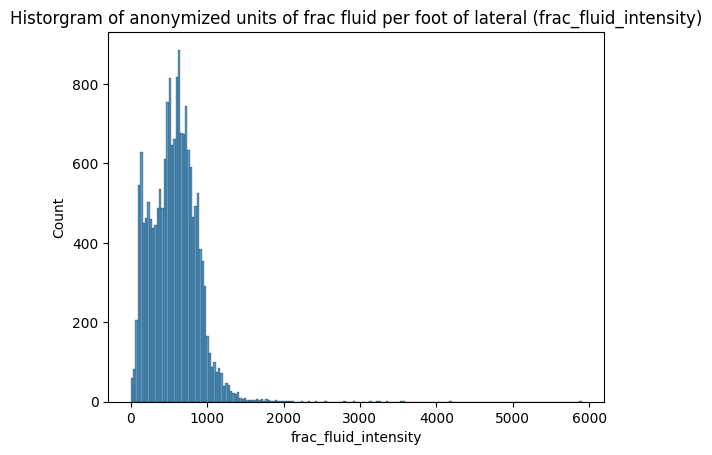

In [30]:
sns.histplot(df3.frac_fluid_intensity)
plt.title("Historgram of anonymized units of frac fluid per foot of lateral (frac_fluid_intensity)");

In [31]:
df3.loc[df3["frac_fluid_intensity"]>5000]

,surface_x,surface_y,gross_perforated_length,total_fluid,true_vertical_depth,ffs_frac_type,proppant_intensity,frac_fluid_intensity,proppant_to_frac_fluid_ratio,frac_fluid_to_proppant_ratio,bin_lateral_length,relative_well_position,batch_frac_classification,well_family_relationship,frac_seasoning,OilPeakRate
10676,1023146.165,1481960.74,5832.677165,34424016.59,7682.086614,Slickwater Only,122.781158,5901.92387,0.020804,48.068645,1.0,Outer Well,Batch-Concurrent Frac,Sibling Well,31.0,124.541289


In [32]:
df3.frac_fluid_to_proppant_ratio.describe()


count    1.750000e+04
mean              inf
std               NaN
min      7.830841e-03
25%      4.257746e+00
50%      5.122011e+00
75%      6.173434e+00
max               inf
Name: frac_fluid_to_proppant_ratio, dtype: float64

<Axes: xlabel='frac_fluid_to_proppant_ratio', ylabel='Count'>

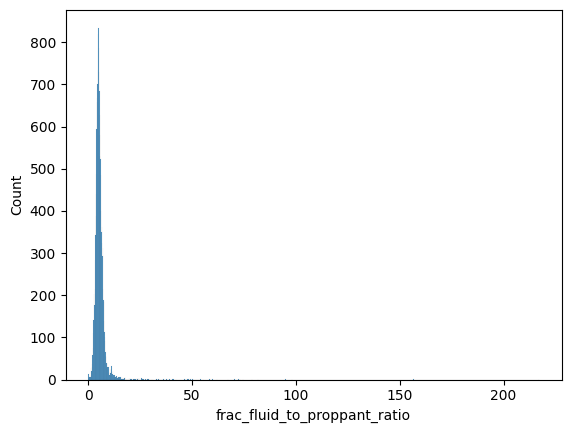

In [33]:
sns.histplot(df3.frac_fluid_to_proppant_ratio)

In [34]:
#identifying the row which is infinity
df3.loc[df3["frac_fluid_to_proppant_ratio"]>100]

,surface_x,surface_y,gross_perforated_length,total_fluid,true_vertical_depth,ffs_frac_type,proppant_intensity,frac_fluid_intensity,proppant_to_frac_fluid_ratio,frac_fluid_to_proppant_ratio,bin_lateral_length,relative_well_position,batch_frac_classification,well_family_relationship,frac_seasoning,OilPeakRate
1347,1074617.716,7.299698e+05,4943.897638,8.273263e+05,7452.755906,Slickwater Linear Hybrid,1.069139,167.342923,0.006389,156.521189,1.0,Outer Well,Non-Batch Frac,Infill Child Well,26.0,204.261936
7478,1237445.755,1.077356e+06,4094.488189,1.462254e+07,4675.196850,NaN,16.447093,3571.273082,0.004605,217.137038,1.0,Standalone Well,Unknown,Standalone Well,NaN,53.815059
17860,1088439.703,1.239307e+06,9187.992126,5.878035e+06,9648.622047,Slickwater Only,0.000000,639.751845,0.000000,inf,2.0,Standalone Well,Non-Batch Frac,Standalone Well,41.0,250.440515


In [35]:
#delete row
df3.drop(index=17860, axis=0, inplace=True)


<ipython-input-35-784ceea7f2de>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.drop(index=17860, axis=0, inplace=True)


In [36]:
df3.loc[df3["frac_fluid_to_proppant_ratio"]>100]

,surface_x,surface_y,gross_perforated_length,total_fluid,true_vertical_depth,ffs_frac_type,proppant_intensity,frac_fluid_intensity,proppant_to_frac_fluid_ratio,frac_fluid_to_proppant_ratio,bin_lateral_length,relative_well_position,batch_frac_classification,well_family_relationship,frac_seasoning,OilPeakRate
1347,1074617.716,7.299698e+05,4943.897638,8.273263e+05,7452.755906,Slickwater Linear Hybrid,1.069139,167.342923,0.006389,156.521189,1.0,Outer Well,Non-Batch Frac,Infill Child Well,26.0,204.261936
7478,1237445.755,1.077356e+06,4094.488189,1.462254e+07,4675.196850,NaN,16.447093,3571.273082,0.004605,217.137038,1.0,Standalone Well,Unknown,Standalone Well,NaN,53.815059


In [37]:
df3.frac_fluid_to_proppant_ratio.describe()
#sns.histplot(df3.frac_fluid_to_proppant_ratio)

count    17499.000000
mean         5.586491
std          3.904906
min          0.007831
25%          4.257594
50%          5.121850
75%          6.172823
max        217.137038
Name: frac_fluid_to_proppant_ratio, dtype: float64

In [38]:
df3.proppant_to_frac_fluid_ratio.describe()
df3.loc[df3["proppant_to_frac_fluid_ratio"]>50]

,surface_x,surface_y,gross_perforated_length,total_fluid,true_vertical_depth,ffs_frac_type,proppant_intensity,frac_fluid_intensity,proppant_to_frac_fluid_ratio,frac_fluid_to_proppant_ratio,bin_lateral_length,relative_well_position,batch_frac_classification,well_family_relationship,frac_seasoning,OilPeakRate
7371,1185367.842,1100235.817,5551.181102,738.095352,4593.503937,NaN,16.979257,0.132962,127.700206,0.007831,1.0,Standalone Well,Non-Batch Frac,Standalone Well,5.0,46.893658
7629,1095201.911,1086338.816,5549.212598,4059.524438,6231.299213,NaN,37.704706,0.731550,51.540872,0.019402,1.0,Outer Well,Unknown,Sibling Well,NaN,70.035725


In [39]:
#Remove outlier
df3.drop(index=7371, axis=0, inplace=True)

<ipython-input-39-f32b9d9ed92b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.drop(index=7371, axis=0, inplace=True)


In [40]:
#Replace missing values of above for less than 10% of data missing

#Fill in NaN Values with mean after checking for outliers and spread of data - bin_lateral_length, gross_perforated_length
df3['bin_lateral_length'].fillna(value=df3.bin_lateral_length.mean(), inplace=True)
df3['gross_perforated_length'].fillna(value=df3.gross_perforated_length.mean(), inplace=True)
df3['proppant_intensity'].fillna(value=df3.proppant_intensity.mean(), inplace=True)
df3['total_fluid'].fillna(value=df3.total_fluid.mean(), inplace=True)
df3['frac_fluid_to_proppant_ratio'].fillna(value=df3.frac_fluid_to_proppant_ratio.mean(), inplace=True)
df3['proppant_to_frac_fluid_ratio'].fillna(value=df3.proppant_to_frac_fluid_ratio.mean(), inplace=True)
df3['true_vertical_depth'].fillna(value=df3.true_vertical_depth.mean(), inplace=True)

#Replace with mode as data RHS skewed
df3['frac_fluid_intensity'].fillna(value=df3.frac_fluid_intensity.median(), inplace=True)


<ipython-input-40-c4c9163eb5cf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bin_lateral_length'].fillna(value=df3.bin_lateral_length.mean(), inplace=True)
<ipython-input-40-c4c9163eb5cf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['gross_perforated_length'].fillna(value=df3.gross_perforated_length.mean(), inplace=True)
<ipython-input-40-c4c9163eb5cf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['proppant_inte

In [41]:
df3

,surface_x,surface_y,gross_perforated_length,total_fluid,true_vertical_depth,ffs_frac_type,proppant_intensity,frac_fluid_intensity,proppant_to_frac_fluid_ratio,frac_fluid_to_proppant_ratio,bin_lateral_length,relative_well_position,batch_frac_classification,well_family_relationship,frac_seasoning,OilPeakRate
0,1.383494e+06,7.173292e+05,3963.582677,3.900855e+06,8712.598425,NaN,19.174572,570.930579,0.224015,5.586810,1.0,Standalone Well,Unknown,Standalone Well,NaN,46.623023
1,1.380344e+06,7.119163e+05,3179.133858,5.610964e+05,8627.952756,NaN,35.544272,176.493480,0.201391,4.965455,1.0,Outer Well,Unknown,Infill Child Well,NaN,59.750009
2,1.379916e+06,7.178450e+05,3810.039370,1.621424e+06,8801.181102,NaN,75.214821,425.566078,0.176741,5.658008,1.0,Standalone Well,Non-Batch Frac,Standalone Well,92.0,10.785716
3,1.383567e+06,7.066402e+05,3723.425197,4.377134e+05,8635.826772,NaN,28.704465,117.556659,0.244176,4.095414,1.0,Standalone Well,Unknown,Standalone Well,NaN,123.797638
4,1.378963e+06,7.026240e+05,3811.023622,6.229802e+05,8664.370079,NaN,29.595648,163.467933,0.181049,5.523377,1.0,Outer Well,Unknown,Infill Child Well,NaN,102.309540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29432,9.477118e+05,1.057502e+06,4101.377953,5.499711e+05,8877.952756,NaN,23.371936,134.094222,0.174295,5.737403,1.0,Standalone Well,Unknown,Standalone Well,NaN,162.307168
29433,9.593475e+05,1.033564e+06,4512.795276,3.900855e+06,8479.330709,Slickwater Crosslink Hybrid,108.575936,570.930579,0.224015,5.586810,1.0,Outer Well,Non-Batch Frac,Sibling Well,14.0,171.071455
29434,9.669162e+05,1.057804e+06,3660.433071,6.214390e+05,8640.748031,Slickwater Crosslink Hybrid,24.001844,169.771992,0.141377,7.073290,1.0,Standalone Well,Non-Batch Frac,Standalone Well,72.0,7.171827
29435,9.462629e+05,1.034169e+06,5930.118110,1.956479e+06,8389.763780,Crosslink Only,64.730101,329.922425,0.196198,5.096893,1.0,Standalone Well,Non-Batch Frac,Standalone Well,15.0,336.044270


In [42]:
df3.isnull().sum().sort_values()/len(df3)

surface_x                       0.000000
surface_y                       0.000000
gross_perforated_length         0.000000
total_fluid                     0.000000
true_vertical_depth             0.000000
proppant_intensity              0.000000
frac_fluid_intensity            0.000000
proppant_to_frac_fluid_ratio    0.000000
frac_fluid_to_proppant_ratio    0.000000
bin_lateral_length              0.000000
relative_well_position          0.000000
batch_frac_classification       0.000000
well_family_relationship        0.000000
OilPeakRate                     0.000000
frac_seasoning                  0.250065
ffs_frac_type                   0.258768
dtype: float64

In [43]:
df3

,surface_x,surface_y,gross_perforated_length,total_fluid,true_vertical_depth,ffs_frac_type,proppant_intensity,frac_fluid_intensity,proppant_to_frac_fluid_ratio,frac_fluid_to_proppant_ratio,bin_lateral_length,relative_well_position,batch_frac_classification,well_family_relationship,frac_seasoning,OilPeakRate
0,1.383494e+06,7.173292e+05,3963.582677,3.900855e+06,8712.598425,NaN,19.174572,570.930579,0.224015,5.586810,1.0,Standalone Well,Unknown,Standalone Well,NaN,46.623023
1,1.380344e+06,7.119163e+05,3179.133858,5.610964e+05,8627.952756,NaN,35.544272,176.493480,0.201391,4.965455,1.0,Outer Well,Unknown,Infill Child Well,NaN,59.750009
2,1.379916e+06,7.178450e+05,3810.039370,1.621424e+06,8801.181102,NaN,75.214821,425.566078,0.176741,5.658008,1.0,Standalone Well,Non-Batch Frac,Standalone Well,92.0,10.785716
3,1.383567e+06,7.066402e+05,3723.425197,4.377134e+05,8635.826772,NaN,28.704465,117.556659,0.244176,4.095414,1.0,Standalone Well,Unknown,Standalone Well,NaN,123.797638
4,1.378963e+06,7.026240e+05,3811.023622,6.229802e+05,8664.370079,NaN,29.595648,163.467933,0.181049,5.523377,1.0,Outer Well,Unknown,Infill Child Well,NaN,102.309540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29432,9.477118e+05,1.057502e+06,4101.377953,5.499711e+05,8877.952756,NaN,23.371936,134.094222,0.174295,5.737403,1.0,Standalone Well,Unknown,Standalone Well,NaN,162.307168
29433,9.593475e+05,1.033564e+06,4512.795276,3.900855e+06,8479.330709,Slickwater Crosslink Hybrid,108.575936,570.930579,0.224015,5.586810,1.0,Outer Well,Non-Batch Frac,Sibling Well,14.0,171.071455
29434,9.669162e+05,1.057804e+06,3660.433071,6.214390e+05,8640.748031,Slickwater Crosslink Hybrid,24.001844,169.771992,0.141377,7.073290,1.0,Standalone Well,Non-Batch Frac,Standalone Well,72.0,7.171827
29435,9.462629e+05,1.034169e+06,5930.118110,1.956479e+06,8389.763780,Crosslink Only,64.730101,329.922425,0.196198,5.096893,1.0,Standalone Well,Non-Batch Frac,Standalone Well,15.0,336.044270


In [44]:
df3.ffs_frac_type.value_counts()

Slickwater Only                4902
Slickwater Crosslink Hybrid    4358
Slickwater Linear Hybrid       3078
Undefined                      1002
Crosslink Only                  894
Linear Only                      74
Name: ffs_frac_type, dtype: int64

In [45]:
df3.frac_type.value_counts()

AttributeError: 'DataFrame' object has no attribute 'frac_type'

In [ ]:
df3.dtypes

In [ ]:
df3
#ffs_frac_type - external research
#batch_frac_classification - need to check
#relative_well_position - encoding
#well_family_relationship - encoding



In [ ]:
#Clustering to fill in
#frac_seasoning                  0.250065
#ffs_frac_type                   0.258768

In [ ]:
#Label encoding for relative_well_position and well_family_relationship
df3.relative_well_position.value_counts()

In [ ]:
df3.well_family_relationship.value_counts()

In [ ]:
label_encoder = LabelEncoder()
df3['relative_well_position']= label_encoder.fit_transform(df3['relative_well_position'])

In [ ]:
df3['relative_well_position'].unique()

In [ ]:
df3['well_family_relationship']= label_encoder.fit_transform(df3['well_family_relationship'])


In [ ]:
df3['well_family_relationship'].unique()

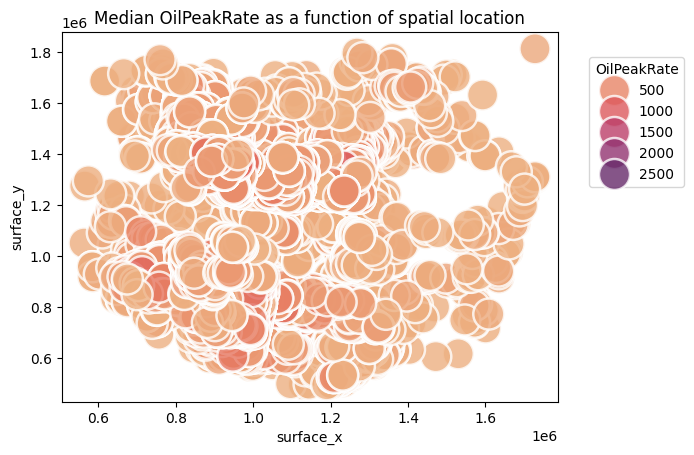

In [46]:
# visualizing the spatial distribution of homes
sns.scatterplot(
    data=df3,
    x="surface_x",
    y="surface_y",
    size="OilPeakRate",
    hue="OilPeakRate",
    palette="flare",
    alpha=0.8,
    sizes=(500, 500)
)
plt.legend(title="OilPeakRate", bbox_to_anchor=(1.05, 0.95), loc="upper left")
plt.title("Median OilPeakRate as a function of spatial location");